<a href="https://colab.research.google.com/github/vasilievan/telecom_labs/blob/main/Vasiliev_lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2022-04-24 10:51:58--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-04-24 10:51:58--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.008s  

2022-04-24 10:51:58 (6.02 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

## Упражнение 2

Создадим треугольный сигнал, напечатаем его, применим функцию diff к сигналу и про-
анализируем результат. Вычислим спектр изначального сигнала, применим differentiate,
проанализируем результат. Преобразуем спектр обратно в сигнал, проанализируем результат
и различия воздействия diff и differentiate на исходный сигнал.

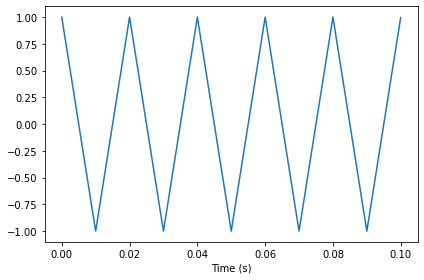

In [3]:
from thinkdsp import TriangleSignal

in_wave = TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

Применение функции diff:

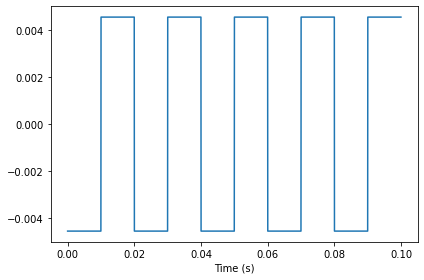

In [4]:
out_wave = in_wave.diff()
out_wave.plot()
decorate(xlabel='Time (s)')

На графике видны изломы (так называемый “звон”) на месте перегиба треугольного сигнала.
Это связанно с тем, что производная треугольного сигнала не определена в точках излома
треугольного сигнала.
Применим дифференцирующий фильтр differentiate:

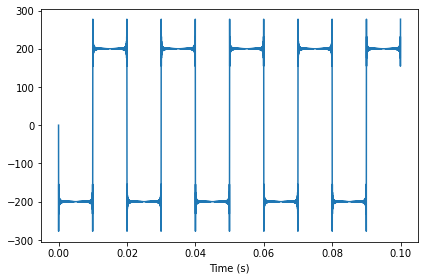

In [5]:
out_wave2 = in_wave.make_spectrum().differentiate().make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

##Упражнение 3

Изучим влияние cumsum и integrate на прямоугольный сигнал. Создадим прямоугольный
сигнал, напечатаем его, применим cumsum. Вычислим спектр исходного сигнала, применим
integrate. Преобразуем спектр в изначальный сигнал, проанлизируем результаты и различия
воздействия cumsum и integrate на прямоугольный сигнал.

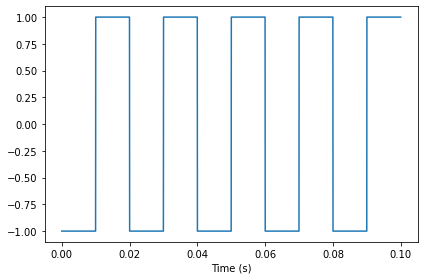

In [6]:
from thinkdsp import SquareSignal

in_wave = SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

Применим функцию нарастующей суммы, которая аппроксимирует интегрирование. Получим
треугольный сигнал.

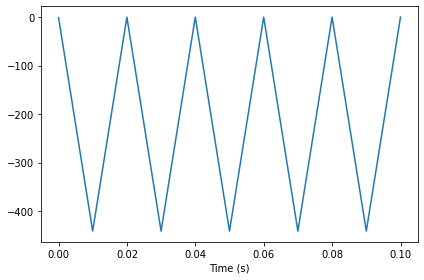

In [7]:
out_wave = in_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (s)')

Спектральный интеграл также является треугольным сигналом, хотя амплитуда совсем дру-
гая.

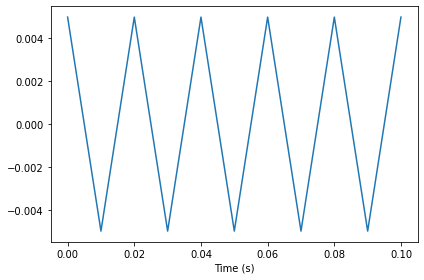

In [8]:
spectrum = in_wave.make_spectrum().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

Но графики выглядят одинаково

##Упражнение 4

Изучим влияние двойного интегрирования на пилообразный сигнал. Вычислим спектр исход-
ного сигнала, а затем дважды применим integrate.

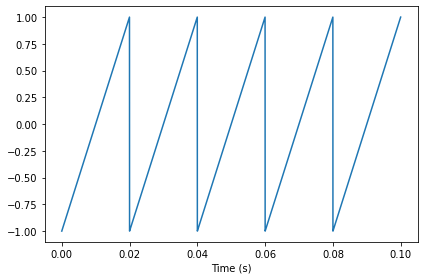

In [9]:
from thinkdsp import SawtoothSignal

in_wave = SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

Первая нарастающая сумма - это парабола:

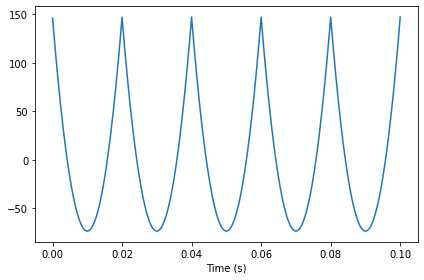

In [10]:
out_wave = in_wave.cumsum()
out_wave.unbias()
out_wave.plot()
decorate(xlabel='Time (s)')

Вторая нарастающая сумма - это кубическая кривая:

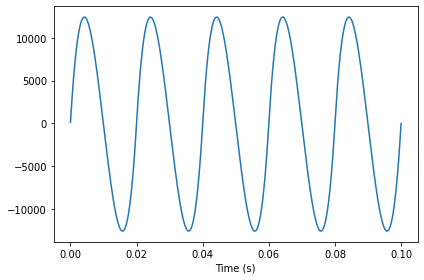

In [11]:
out_wave = out_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (s)')

Дважды интегрируем и получаем также кубическую кривую:

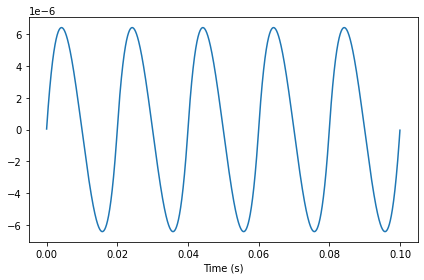

In [12]:
spectrum = in_wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

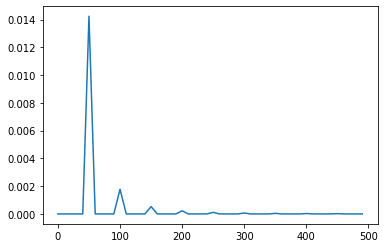

In [13]:
out_wave2.make_spectrum().plot(high=500)

Полученный график похож на синусоиду, двойная интеграция действует как фильтр нижних
частот.

##Упражнение 5

Изучим влияние второй разности и второй производной на CubicSignal сигнале, который
определен в thinkdsp. Вычислим вторую разность, дважды применив diff. Вычислим вторую
производную, дважды применив differentiate к спектру. Проанализируем получившиеся ре-
зультаты.

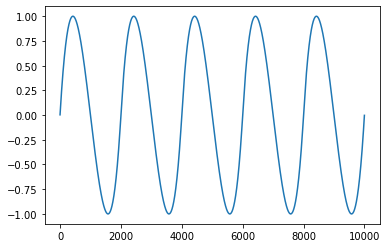

In [14]:
from thinkdsp import CubicSignal

in_wave = CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()

Первая разность - это парабола, а вторая разность - пилообразный сигнал.

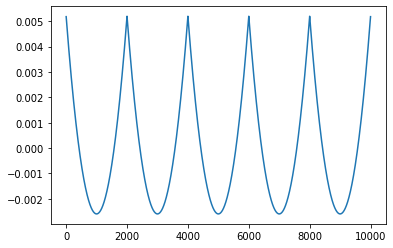

In [15]:
out_wave = in_wave.diff()
out_wave.plot()

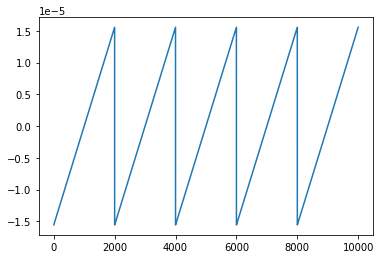

In [16]:
out_wave = out_wave.diff()
out_wave.plot()

После двойного диффернцирования differentiate на графике видно пилообразный сигнал с
небольшим звоном. Такой результат получается из-за того, что производная параболического
сигнала не определена в некоторых точках.

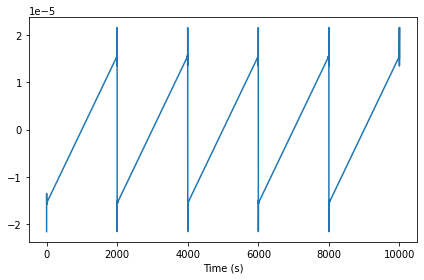

In [17]:
spectrum = in_wave.make_spectrum().differentiate().differentiate()
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

Окно второй разности это -1, 2, -1 Вычисляя ДПФ, можно найти соответствующий фильтр.

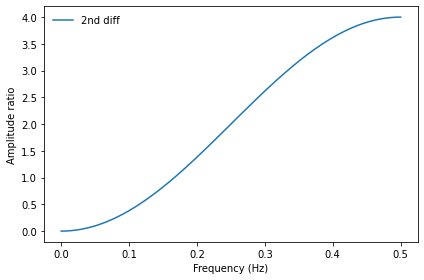

In [18]:
from thinkdsp import zero_pad
from thinkdsp import Wave

diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(in_wave))
diff_wave = Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot(label='2nd diff')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

Для второй производной можно найти соответствующий фильтр, рассчитав фильтр первой
прозводной и возведя его в квадрат.

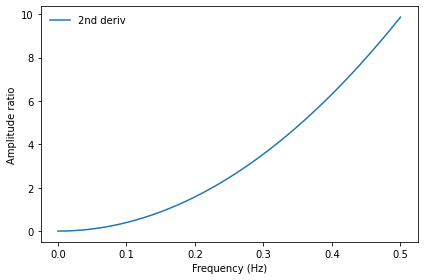

In [19]:
PI2 = np.pi * 2

deriv_filter = in_wave.make_spectrum()
deriv_filter.hs = (PI2 * 1j * deriv_filter.fs)**2
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')